In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Loading Financial Data

In [2]:
# Load Data
company = "GS"

In [3]:
start = dt.datetime (2012,1,1)
end = dt.datetime(2020,1,1)

In [4]:
data = web.DataReader (company, "yahoo", start, end)

# Preparing Data

In [5]:
# Prepare data
scaler = MinMaxScaler (feature_range=(0,1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape (-1,1))

In [6]:
# Number of days we look in the past to predict next day stock price
prediction_days = 60

In [7]:
# Define two empty lists
x_train = []
y_train = []

# Prepare the training data
for x in range (prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append (scaled_data[x,0])

In [8]:
# Convert into Numpy Arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train 
x_train = np.reshape (x_train, (x_train.shape [0], x_train.shape[1],1))

# Neural Network Model

In [9]:
# Build model 
model = Sequential()

In [10]:
# Specify the layers
model.add(LSTM (units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add (Dropout (0.2))
model.add(LSTM (units = 50, return_sequences = True))
model.add (Dropout (0.2))   
model.add(LSTM (units = 50))
model.add (Dropout (0.2))
model.add (Dense (units = 1)) # Prediction of the next-day price

In [11]:
# Compile the model
model.compile (optimizer = "adam", loss = "mean_squared_error")
model.fit (x_train, y_train, epochs = 25, batch_size = 32) 

Epoch 1/25
61/61 [==============================] - 6s 52ms/step - loss: 0.0276
Epoch 2/25
61/61 [==============================] - 4s 60ms/step - loss: 0.0061
Epoch 3/25
61/61 [==============================] - 3s 57ms/step - loss: 0.0053
Epoch 4/25
61/61 [==============================] - 4s 58ms/step - loss: 0.0047
Epoch 5/25
61/61 [==============================] - 4s 58ms/step - loss: 0.0044
Epoch 6/25
61/61 [==============================] - 4s 63ms/step - loss: 0.0042
Epoch 7/25
61/61 [==============================] - 4s 58ms/step - loss: 0.0043
Epoch 8/25
61/61 [==============================] - 4s 60ms/step - loss: 0.0039
Epoch 9/25
61/61 [==============================] - 4s 73ms/step - loss: 0.0035
Epoch 10/25
61/61 [==============================] - 5s 74ms/step - loss: 0.0034
Epoch 11/25
61/61 [==============================] - 5s 75ms/step - loss: 0.0033
Epoch 12/25
61/61 [==============================] - 5s 78ms/step - loss: 0.0032
Epoch 13/25
61/61 [==================

# Testing the Model Accuracy on Existing Data

In [12]:
# Load Test Data
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader (company, "yahoo", test_start, test_end)
actual_prices = test_data ["Close"].values

In [13]:
# Concatenate both test data and actual data
total_dataset = pd.concat ((data["Close"], test_data["Close"]),axis = 0)

In [15]:
model_inputs = total_dataset [len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape (-1,1)
model_inputs = scaler.transform (model_inputs)

In [16]:
# Make Prediction on Test Data
x_test = []

for x in range (prediction_days, len(model_inputs) + 1):
    x_test.append (model_inputs [x - prediction_days:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape (x_test, (x_test.shape [0], x_test.shape[1],1))

predicted_prices = model.predict (x_test)
predicted_prices = scaler.inverse_transform (predicted_prices)

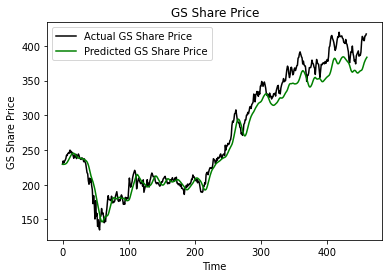

In [17]:
# Plot the Predictions 
plt.plot (actual_prices, color = "black", label = f"Actual {company} Share Price")
plt.plot (predicted_prices, color = "green", label = f"Predicted {company} Share Price")
plt.title (f"{company} Share Price")
plt.xlabel ("Time")
plt.ylabel (f"{company} Share Price")
plt.legend()
plt.show()

# Price Predictions

In [18]:
# Predict Next Day
real_data = [model_inputs [len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]
real_data = np.array (real_data)
real_data = np.reshape (real_data, (real_data.shape [0], real_data.shape[1],1))

In [19]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform (prediction)
print (f"Prediction: {prediction}")

Prediction: [[383.6743]]
